In [6]:
import matplotlib.pyplot as plt
import sys 

dir = 'C:\\Users\\u241346\\uni_hamburg\\glidertest'
sys.path.append(dir)

from glidertest import fetchers
from glidertest import tools

### Load dataset

Load an example dataset using `glidertest.fetchers.load_sample_dataset`

Alternatively, use your own with e.g. `ds = xr.open_dataset('/path/to/yourfile.nc')`

In [7]:
ds = fetchers.load_sample_dataset()

In [8]:
ds

<xarray.Dataset> Size: 77MB
Dimensions:                                   (N_MEASUREMENTS: 750625)
Coordinates:
    TIME                                      (N_MEASUREMENTS) datetime64[ns] 6MB ...
    LATITUDE                                  (N_MEASUREMENTS) float64 6MB ...
    LONGITUDE                                 (N_MEASUREMENTS) float64 6MB ...
    DEPTH                                     (N_MEASUREMENTS) float32 3MB ...
Dimensions without coordinates: N_MEASUREMENTS
Data variables: (12/31)
    CHLA                                      (N_MEASUREMENTS) float32 3MB ...
    CHLA_QC                                   (N_MEASUREMENTS) int8 751kB ...
    CNDC                                      (N_MEASUREMENTS) float32 3MB ...
    CNDC_QC                                   (N_MEASUREMENTS) int8 751kB ...
    DOXY                                      (N_MEASUREMENTS) float32 3MB ...
    DOXY_QC                                   (N_MEASUREMENTS) int8 751kB ...
    ...                                        ...
    DEPLOYMENT_LONGITUDE                      float64 8B ...
    PHASE                                     (N_MEASUREMENTS) float32 3MB ...
    SENSOR_ADVS_AND_TURBULENCE_PROBES_103356  float32 4B ...
    SENSOR_CTD_206523                         float32 4B ...
    SENSOR_FLUOROMETERS_7485                  float32 4B ...
    SENSOR_DISSOLVED_GAS_SENSORS_0041         float32 4B ...
Attributes: (12/73)
    Conventions:                                CF-1.10, OG-1.0
    Metadata_Conventions:                       CF-1.6, Unidata Dataset Disco...
    acknowledgement:                            This study used data collecte...
    basin:                                      Western Gotland Basin
    cdm_data_type:                              Trajectory
    comment:                                    Dataset for demonstration pur...
    ...                                         ...
    agency_role:                                contact point
    agency_role_vocabulary:                     https://vocab.nerc.ac.uk/coll...
    data_url:                                   https://erddap.observations.v...
    rtqc_method:                                IOOS QC QARTOD https://github...
    rtqc_method_doi:                            None
    start_date:                                 2023-09-06T08:52:42.829000000

### Check basic data and water column structure first

C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:47: RuntimeWarning: Mean of empty slice
  clin = np.where(np.abs(np.diff(np.nanmean(var, axis=0))) == np.nanmax(np.abs(np.diff(np.nanmean(var, axis=0)))))
C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:73: RuntimeWarning: Mean of empty slice
  ax[0].plot(np.nanmean(tempG, axis=0), depthG[0, :], c='blue')
C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:74: RuntimeWarning: Mean of empty slice
  ax1.plot(np.nanmean(salG, axis=0), depthG[0, :], c='red')
C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:75: RuntimeWarning: Mean of empty slice
  ax2.plot(np.nanmean(denG, axis=0), depthG[0, :], c='black')
C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:98: RuntimeWarning: Mean of empty slice
  ax2_1.plot(np.nanmean(chlaG, axis=0), depthG[0, :], c='green')


The thermocline, halocline and pycnocline are located at respectively [17.9], [57.9] and [17.9]m as shown in the plots as well


C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:109: RuntimeWarning: Mean of empty slice
  ax[1].plot(np.nanmean(oxyG, axis=0), depthG[0, :], c='orange')


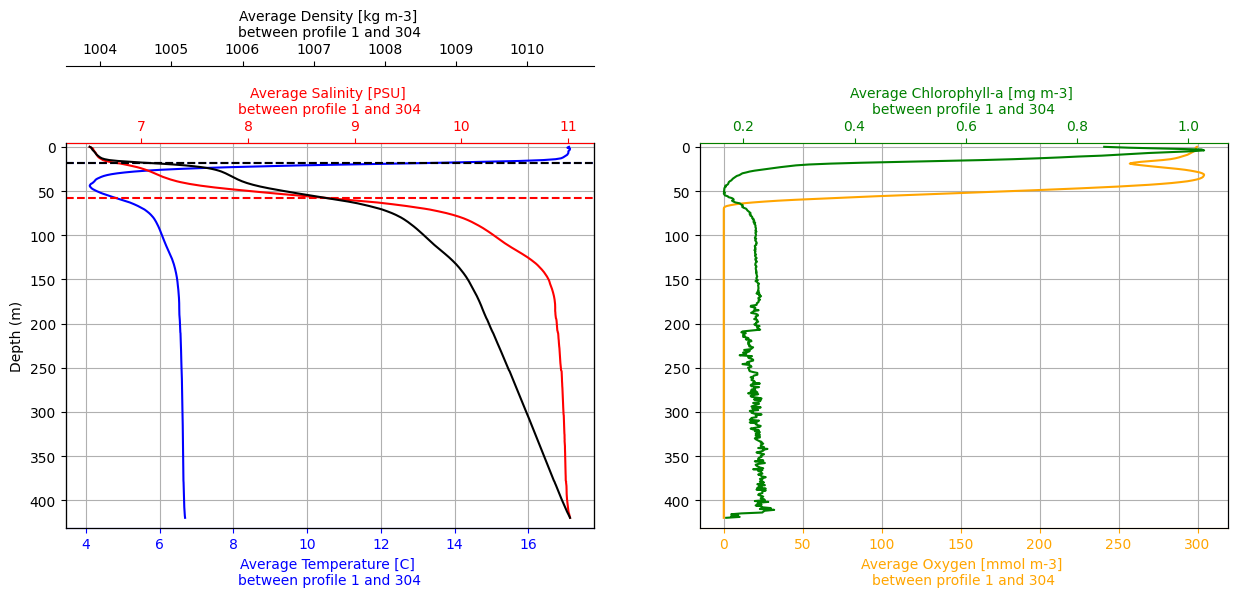

In [9]:
tools.plot_basic_vars(ds,v_res=1, start_prof=1, end_prof=int(ds.PROFILE_NUMBER.max()))

C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:32: RuntimeWarning: Mean of empty slice
  dc = np.nanmean(grad[0::2, :], axis=0)  # Dive - CLimb
C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:33: RuntimeWarning: Mean of empty slice
  cd = np.nanmean(grad[1::2, :], axis=0)  # Climb - Dive
C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:32: RuntimeWarning: Mean of empty slice
  dc = np.nanmean(grad[0::2, :], axis=0)  # Dive - CLimb
C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:33: RuntimeWarning: Mean of empty slice
  cd = np.nanmean(grad[1::2, :], axis=0)  # Climb - Dive
C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:32: RuntimeWarning: Mean of empty slice
  dc = np.nanmean(grad[0::2, :], axis=0)  # Dive - CLimb
C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.py:33: RuntimeWarning: Mean of empty slice
  cd = np.nanmean(grad[1::2, :], axis=0)  # Climb - Dive
C:\Users\u241346\uni_hamburg\glidertest\glidertest\tools.p

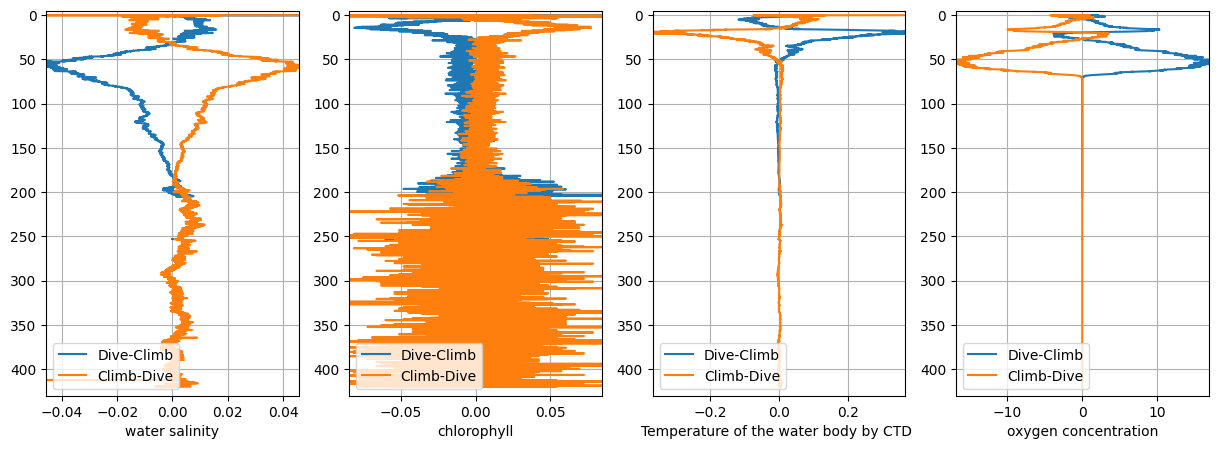

In [10]:
fig, ax = plt.subplots(1,4,figsize=(15, 5))
tools.test_updown_bias(ds, ax[0],var='PSAL',v_res=0.1)
tools.test_updown_bias(ds,ax[1], var='CHLA',v_res=0.1)
tools.test_updown_bias(ds, ax[2], var='TEMP',v_res=0.1)
tools.test_updown_bias(ds, ax[3], var='DOXY',v_res=0.1)

### Chlorophyll
Reminder this mission had issues with FLBBCD, got flooded

0.2% of scaled chlorophyll data is negative, consider recalibrating data
Negative data in present from 2023-09-06T08:52 to 2023-09-10T13:06
Negative data is present between -0.0 and 4.699999809265137 
Chlorophyll data is missing for part of the mission


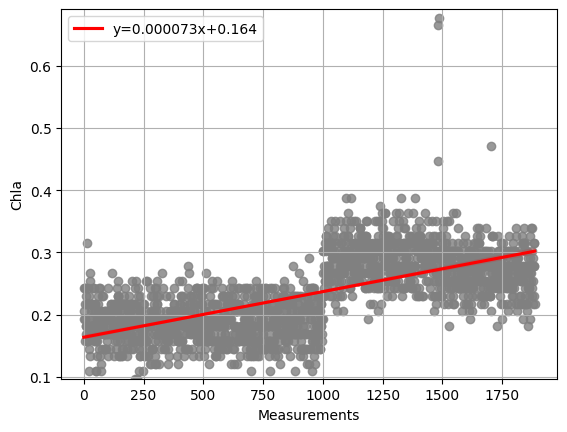

Data from the deepest 10% of data has been analysed and data does not seem stable. An alternative solution for dark counts has to be considered. 
Moreover, it is recommended to check the sensor has this may suggest issues with the sensor (i.e water inside the sensor, temporal drift etc)


In [11]:
tools.chl_first_check(ds)